<a href="https://colab.research.google.com/github/ugokingz/skills-introduction-to-github/blob/main/SQLASSIGN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
upload=files.upload()

Saving Chinook_Sqlite.sqlite to Chinook_Sqlite.sqlite


In [ ]:
import sqlite3
import pandas as pd

#Connect to the SQLite database
conn = sqlite3.connect('Chinook_Sqlite.sqlite')

table_list = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", conn)
print(table_list)

#Close the connection
conn.close()

             name
0           Album
1          Artist
2        Customer
3        Employee
4           Genre
5         Invoice
6     InvoiceLine
7       MediaType
8        Playlist
9   PlaylistTrack
10          Track


In [ ]:
import sqlite3
import pandas as pd
conn = sqlite3.connect('Chinook_Sqlite.sqlite')

# Query to retrieve the top 10 records
query = "SELECT * FROM Album LIMIT 10"

# Execute the query and load results into a DataFrame
top_10_album = pd.read_sql_query(query, conn)

print(top_10_album)

# Close the connection
conn.close()

   AlbumId                                  Title  ArtistId
0        1  For Those About To Rock We Salute You         1
1        2                      Balls to the Wall         2
2        3                      Restless and Wild         2
3        4                      Let There Be Rock         1
4        5                               Big Ones         3
5        6                     Jagged Little Pill         4
6        7                               Facelift         5
7        8                         Warner 25 Anos         6
8        9         Plays Metallica By Four Cellos         7
9       10                             Audioslave         8


In [ ]:
import sqlite3
import pandas as pd
conn = sqlite3.connect('Chinook_Sqlite.sqlite')

# Execute the query and load results into a DataFrame
tracks_per_genre = pd.read_sql_query(query, conn)

# Display the result
print(tracks_per_genre)

# Close the connection
conn.close()

   AlbumId                                  Title  ArtistId
0        1  For Those About To Rock We Salute You         1
1        2                      Balls to the Wall         2
2        3                      Restless and Wild         2
3        4                      Let There Be Rock         1
4        5                               Big Ones         3
5        6                     Jagged Little Pill         4
6        7                               Facelift         5
7        8                         Warner 25 Anos         6
8        9         Plays Metallica By Four Cellos         7
9       10                             Audioslave         8


In [ ]:
import sqlite3
import pandas as pd
conn = sqlite3.connect('Chinook_Sqlite.sqlite')

# SQL query to calculate total sales by country
query = """SELECT Customer.Country, SUM(Invoice.Total) AS Total_Sales
FROM Invoice
JOIN Customer ON Invoice.CustomerId = Customer.CustomerId
GROUP BY Customer.Country
ORDER BY Total_Sales DESC;
"""

# Execute the query and store the result in a DataFrame
total_sales_by_country = pd.read_sql_query(query, conn)

# Display the result
print(total_sales_by_country)

# Close the connection
conn.close()


           Country  Total_Sales
0              USA       523.06
1           Canada       303.96
2           France       195.10
3           Brazil       190.10
4          Germany       156.48
5   United Kingdom       112.86
6   Czech Republic        90.24
7         Portugal        77.24
8            India        75.26
9            Chile        46.62
10         Ireland        45.62
11         Hungary        45.62
12         Austria        42.62
13         Finland        41.62
14     Netherlands        40.62
15          Norway        39.62
16          Sweden        38.62
17          Poland        37.62
18           Italy        37.62
19         Denmark        37.62
20       Australia        37.62
21       Argentina        37.62
22           Spain        37.62
23         Belgium        37.62


In [ ]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('Chinook_Sqlite.sqlite')

# SQL query to get the top 5 customers by total purchase amount
query = """
SELECT Customer.CustomerId, Customer.FirstName, Customer.LastName,
       SUM(Invoice.Total) AS Total_Purchase
FROM Invoice
JOIN Customer ON Invoice.CustomerId = Customer.CustomerId
GROUP BY Customer.CustomerId, Customer.FirstName, Customer.LastName
ORDER BY Total_Purchase DESC
LIMIT 5;
"""

# Execute the query and store the result in a DataFrame
top_5_customers = pd.read_sql_query(query, conn)

# Display the result
print(top_5_customers)

# Close the connection
conn.close()

   CustomerId FirstName    LastName  Total_Purchase
0           6    Helena        Holý           49.62
1          26   Richard  Cunningham           47.62
2          57      Luis       Rojas           46.62
3          45  Ladislav      Kovács           45.62
4          46      Hugh    O'Reilly           45.62


In [ ]:
import sqlite3
import pandas as pd

# Connect to the SQLite database (Ensure you have 'Chinook_Sqlite.sqlite' in your Colab environment)
conn = sqlite3.connect('Chinook_Sqlite.sqlite')

# SQL Query to find the most popular artist by total track sales
query = """
SELECT ar.Name AS Artist, SUM(il.UnitPrice * il.Quantity) AS TotalSales
FROM InvoiceLine il
JOIN Track t ON il.TrackId = t.TrackId
JOIN Album al ON t.AlbumId = al.AlbumId
JOIN Artist ar ON al.ArtistId = ar.ArtistId
GROUP BY ar.ArtistId
ORDER BY TotalSales DESC
LIMIT 1;
"""

# Execute query and load results into a DataFrame
most_popular_artist = pd.read_sql_query(query, conn)

# Display the result
print(most_popular_artist)

# Close the connection
conn.close()

        Artist  TotalSales
0  Iron Maiden       138.6


In [ ]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('Chinook_Sqlite.sqlite')

# Load Customer and Invoice tables into Pandas DataFrames
df_customer = pd.read_sql_query("SELECT CustomerId, Country FROM Customer", conn)
df_invoice = pd.read_sql_query("SELECT CustomerId, Total FROM Invoice", conn)

# Merge the two DataFrames on CustomerId
df_merged = pd.merge(df_invoice, df_customer, on="CustomerId")

# Calculate the average invoice total by country
df_avg_invoice = df_merged.groupby("Country")["Total"].mean().reset_index()

# Rename the column for clarity
df_avg_invoice.rename(columns={"Total": "Avg_Invoice_Total"}, inplace=True)

# Display the results
print(df_avg_invoice)

# Close the connection
conn.close()

           Country  Avg_Invoice_Total
0        Argentina           5.374286
1        Australia           5.374286
2          Austria           6.088571
3          Belgium           5.374286
4           Brazil           5.431429
5           Canada           5.427857
6            Chile           6.660000
7   Czech Republic           6.445714
8          Denmark           5.374286
9          Finland           5.945714
10          France           5.574286
11         Germany           5.588571
12         Hungary           6.517143
13           India           5.789231
14         Ireland           6.517143
15           Italy           5.374286
16     Netherlands           5.802857
17          Norway           5.660000
18          Poland           5.374286
19        Portugal           5.517143
20           Spain           5.374286
21          Sweden           5.517143
22             USA           5.747912
23  United Kingdom           5.374286


In [ ]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('Chinook_Sqlite.sqlite')

# SQL Query to analyze sales performance of each employee
query = """
SELECT
    e.EmployeeId,
    e.FirstName || ' ' || e.LastName AS EmployeeName,
    SUM(i.Total) AS TotalSales
FROM Employee e
JOIN Customer c ON e.EmployeeId = c.SupportRepId
JOIN Invoice i ON c.CustomerId = i.CustomerId
GROUP BY e.EmployeeId, EmployeeName
ORDER BY TotalSales DESC;
"""

# Execute query and load results into a DataFrame
sales_performance = pd.read_sql_query(query, conn)

# Display the result
print(sales_performance)

# Close the connection
conn.close()

   EmployeeId   EmployeeName  TotalSales
0           3   Jane Peacock      833.04
1           4  Margaret Park      775.40
2           5  Steve Johnson      720.16


      Month  MonthlySales
0   2009-01         35.64
1   2009-02         37.62
2   2009-03         37.62
3   2009-04         37.62
4   2009-05         37.62
5   2009-06         37.62
6   2009-07         37.62
7   2009-08         37.62
8   2009-09         37.62
9   2009-10         37.62
10  2009-11         37.62
11  2009-12         37.62
12  2010-01         52.62
13  2010-02         46.62
14  2010-03         44.62
15  2010-04         37.62
16  2010-05         37.62
17  2010-06         37.62
18  2010-07         37.62
19  2010-08         37.62
20  2010-09         36.63
21  2010-10         37.62
22  2010-11         37.62
23  2010-12         37.62
24  2011-01         37.62
25  2011-02         37.62
26  2011-03         37.62
27  2011-04         51.62
28  2011-05         42.62
29  2011-06         50.62
30  2011-07         37.62
31  2011-08         37.62
32  2011-09         37.62
33  2011-10         37.62
34  2011-11         23.76
35  2011-12         37.62
36  2012-01         37.62
37  2012-02 

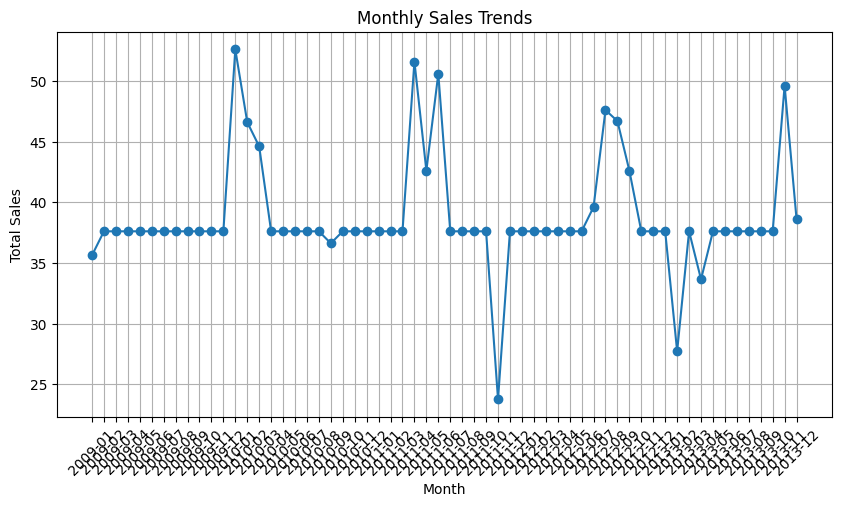

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('Chinook_Sqlite.sqlite')

# Query to retrieve sales data with the invoice date
query = """
SELECT
    strftime('%Y-%m', InvoiceDate) AS Month,
    SUM(Total) AS MonthlySales
FROM Invoice
GROUP BY Month
ORDER BY Month;
"""

# Load the result into a Pandas DataFrame
monthly_sales = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Display the DataFrame
print(monthly_sales)

# Plot the trend
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['Month'], monthly_sales['MonthlySales'], marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trends')
plt.xticks(rotation=45)
plt.grid()
plt.show()